In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pathlib import Path

# 📂 Carpeta donde se guardarán los gráficos
reports_path = Path.cwd().parent / "reports"
reports_path.mkdir(parents=True, exist_ok=True)

# 🍃 Conexión a MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["TurismoPeru_2025"]
coleccion = db["Visitantes"]

# 📥 Extraer datos desde MongoDB
df = pd.DataFrame(list(coleccion.find()))
print(f"✅ Registros cargados desde MongoDB: {len(df)}")

# Asegurar tipos de datos correctos
df["fecha_visita"] = pd.to_datetime(df["fecha_visita"], errors="coerce")
df["mes"] = df["fecha_visita"].dt.month_name()




✅ Registros cargados desde MongoDB: 3000


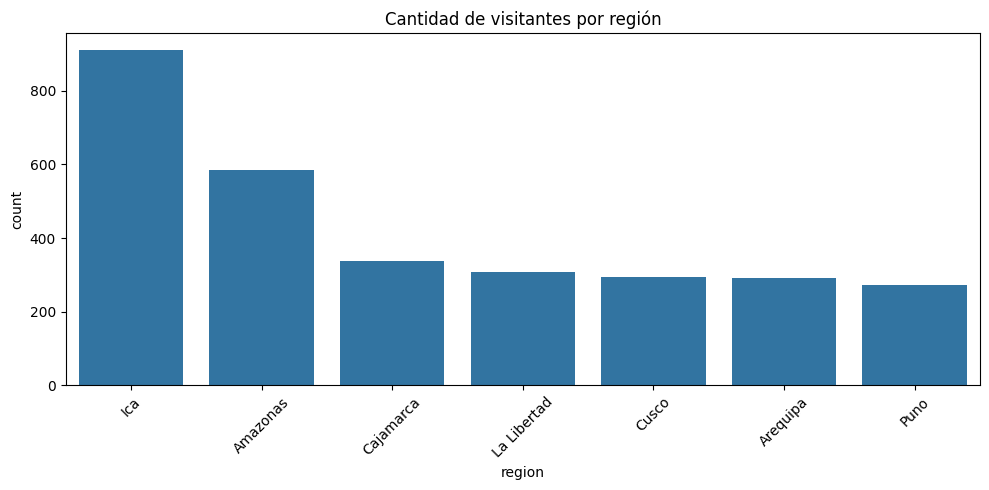

In [2]:
# =========================
# 1️⃣ Visitantes por región
# =========================
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="region", order=df["region"].value_counts().index)
plt.title("Cantidad de visitantes por región")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(reports_path / "1_visitantes_por_region.png")
plt.show()


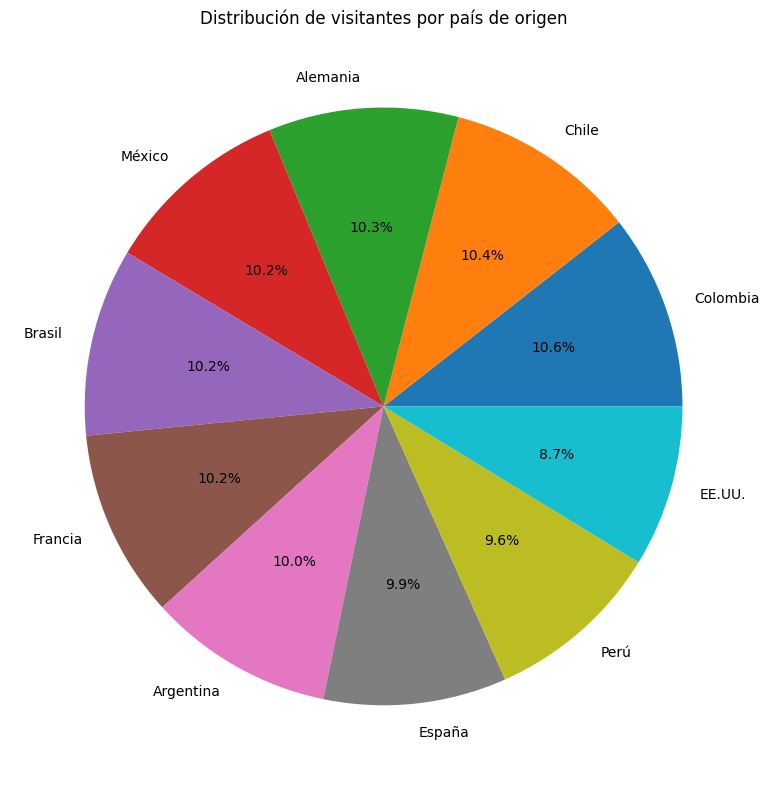

In [3]:

# =========================
# 2️⃣ País de origen (Gráfico circular)
# =========================
plt.figure(figsize=(8,8))
df["pais_origen"].value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.title("Distribución de visitantes por país de origen")
plt.ylabel("")
plt.tight_layout()
plt.savefig(reports_path / "2_pais_origen.png")
plt.show()


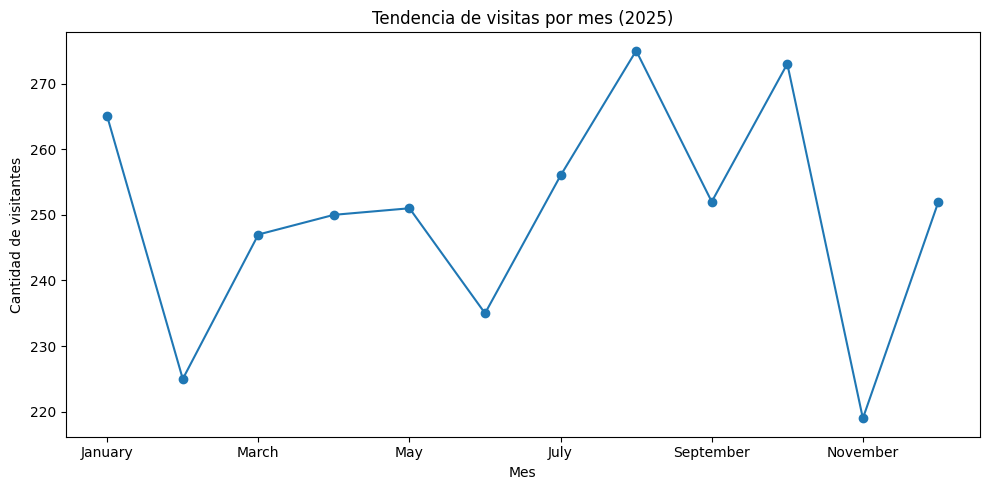

In [4]:

# =========================
# 3️⃣ Tendencia mensual (línea temporal)
# =========================
plt.figure(figsize=(10,5))
df.groupby("mes").size().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]).plot(marker="o")
plt.title("Tendencia de visitas por mes (2025)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de visitantes")
plt.tight_layout()
plt.savefig(reports_path / "3_tendencia_mensual.png")
plt.show()


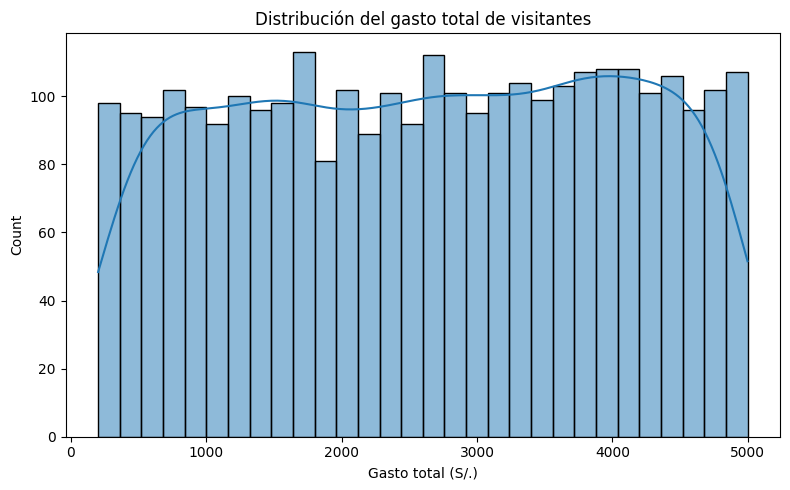

In [5]:

# =========================
# 4️⃣ Histograma del gasto total
# =========================
plt.figure(figsize=(8,5))
sns.histplot(df["gasto_total"], bins=30, kde=True)
plt.title("Distribución del gasto total de visitantes")
plt.xlabel("Gasto total (S/.)")
plt.tight_layout()
plt.savefig(reports_path / "4_histograma_gasto.png")
plt.show()


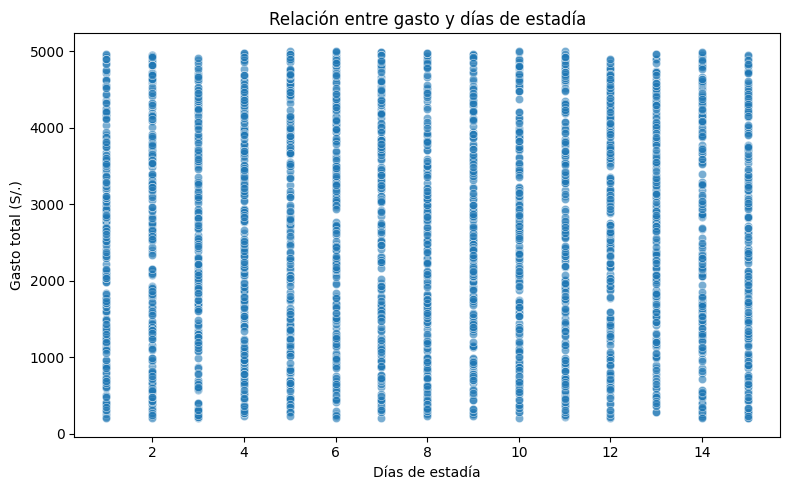


📁 Gráficos guardados en: c:\Users\VALDIVIA\Desktop\UNC 2025-II\TOPICOS EN INTELIGENCIA DE NEGOCIOS\TurismoDigitalB_E1\reports


In [6]:

# =========================
# 5️⃣ Dispersión: gasto vs días de estadía
# =========================
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="dias_estadia", y="gasto_total", alpha=0.6)
plt.title("Relación entre gasto y días de estadía")
plt.xlabel("Días de estadía")
plt.ylabel("Gasto total (S/.)")
plt.tight_layout()
plt.savefig(reports_path / "5_scatter_gasto_dias.png")
plt.show()

print(f"\n📁 Gráficos guardados en: {reports_path}")